# Introduction

A study was conducted to determine what factors have an effect on colleges and university graduation rates. A sample of 55 colleges and universities from across the United States was used in the regression analysis. The main purpose of this study is to construct a model that can be used to predict the graduation rate of a college or university depending on several factors. The factors that were analyzed were median SAT score, acceptance rate, expenditures per student, the percentage of students in the top 10% of their high school class and whether the institution was university or a liberal arts college.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

%matplotlib inline 

### Let's begin with some simple EDA

Let's first import the sample data from the excel workbook

In [3]:
# reading in the excel workbook 
xl = pd.ExcelFile('Project 4 Data.xlsx')

print(xl.sheet_names)

['Data']


In [4]:
# loading in the sheet into a dataframe
df = xl.parse('Data')

# Looking into our dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
School                  51 non-null object
Type                    51 non-null object
Expenditures/Student    51 non-null int64
Top 10% HS              51 non-null int64
Median SAT              51 non-null int64
Graduation % (Y)        51 non-null int64
Acceptance Rate         51 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 2.9+ KB


In [5]:
# Printing the first 5 rows of our dataset
df.head()

,School,Type,Expenditures/Student,Top 10% HS,Median SAT,Graduation % (Y),Acceptance Rate
0,Princeton,University,48123,89,1340,93,0.17
1,Harvard,University,46918,90,1370,90,0.18
2,Stanford,University,61921,92,1370,88,0.18
3,Yale,University,52468,90,1350,93,0.19
4,Amherst,Lib Arts,26636,85,1315,93,0.22


In our dataset we have 7 columns with 51 records. Two of our columns are objects("Strings") with the rest continous variables.  The "Top 10% HS" and "Graduation % (Y)" are given in a range from 0-100 unlike our "Acceptance Rate" column which is a float in a range from 0.00 - 1.00. It appears that our data is relatively clean.

It is time to explore the data a little further with some summary statistics and visualizations.

In [6]:
# Making the percentage range match with that graduation % and top 10%
df['Acceptance Rate'] = df['Acceptance Rate'].apply(lambda x: x * 100)

# Reordering the columns in the dataframe so we have our target variable as the last column
df = df[['School', 'Type', 'Expenditures/Student', 'Median SAT','Top 10% HS', 'Acceptance Rate', 'Graduation % (Y)']]

# creating summary statistics
df.describe()

,Expenditures/Student,Median SAT,Top 10% HS,Acceptance Rate,Graduation % (Y)
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,29912.019608,1261.725490,73.039216,38.960784,82.803922
std,15149.975201,61.863747,14.197128,14.115184,7.665558
min,15904.000000,1109.000000,47.000000,17.000000,61.000000
25%,20284.500000,1222.500000,62.500000,28.500000,77.000000
50%,24718.000000,1260.000000,75.000000,37.000000,85.000000
75%,35372.000000,1300.000000,85.000000,48.500000,88.500000
max,102262.000000,1400.000000,98.000000,76.000000,93.000000


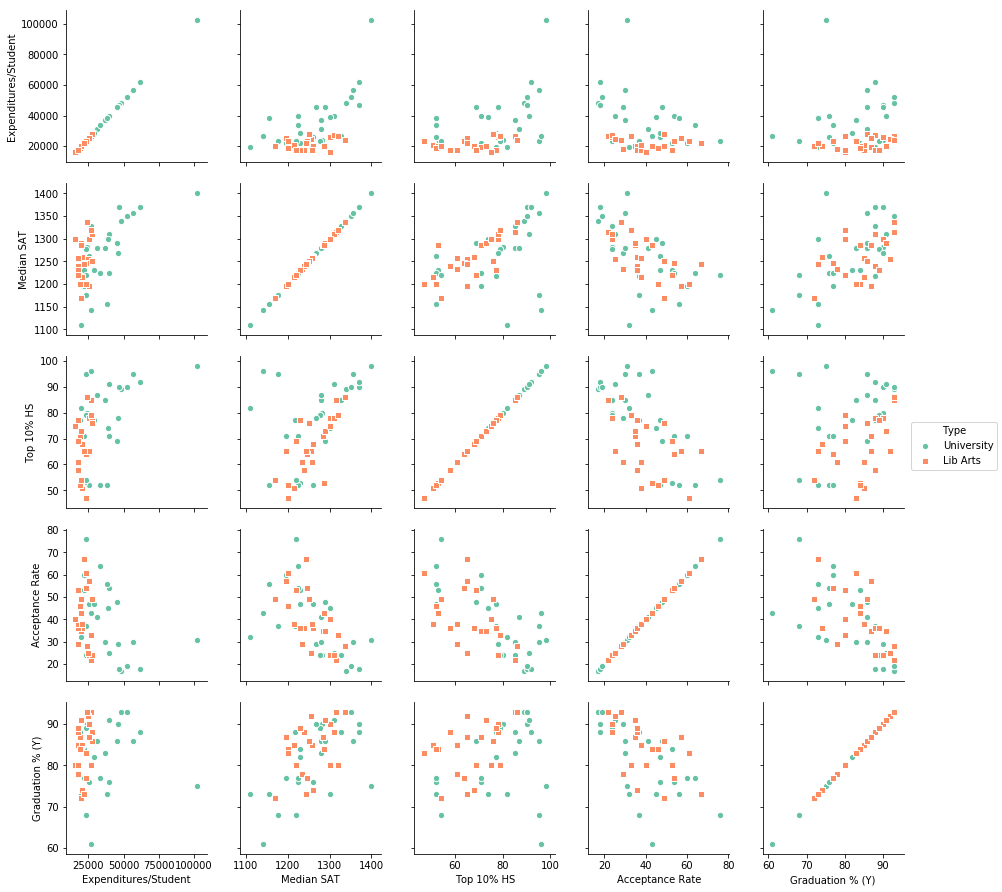

In [7]:
# Creating a pairgrid to look for trends within the variables, specefically our variable of interest 'Graduation %'
ax = sns.PairGrid(df, hue="Type", palette="Set2",
                 hue_kws={"marker": ["o", "s"]})
ax = ax.map(plt.scatter, linewidths=1, edgecolor="w", s=40)
ax = ax.add_legend()

From the pair grid we have already gain some valuable insights. The first thing that stands out like a sore thumnb is the outlier in expenditures/students. There is a school where it has a expenditure of a bit over $100,000. We will probally want to remove this outlier before we begin our regression analysis.

Let now create some box plots and violin plots to see how the data is distributed by university type


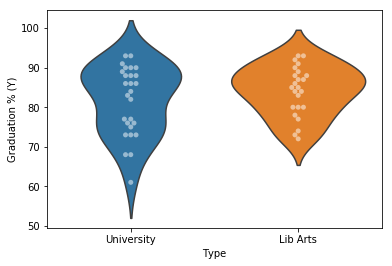

In [8]:
# creating a violin plot to see the distribution
sns.violinplot(x='Type', y='Graduation % (Y)', data=df, inner=None)
sns.swarmplot(x='Type', y='Graduation % (Y)', data=df, color="w", alpha=.5);

We see that there is slight more variance with graduation percentage with University compared to Liberal Arts school


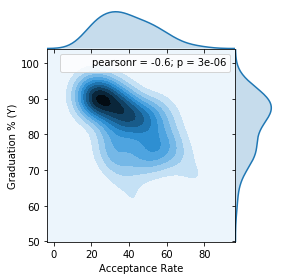

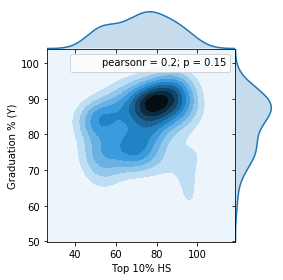

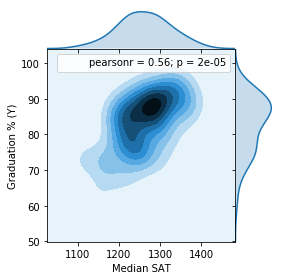

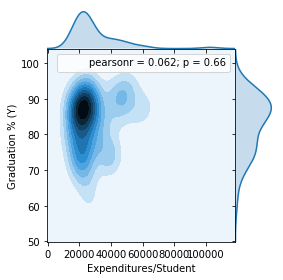

In [9]:
# Creating 4 kde graphs to again explore correlation
sns.jointplot(df['Acceptance Rate'], df['Graduation % (Y)'], kind="kde", size=4, space=0)

sns.jointplot(df['Top 10% HS'], df['Graduation % (Y)'], kind="kde", size=4, space=0)

sns.jointplot(df['Median SAT'], df['Graduation % (Y)'], kind="kde", size=4, space=0)

sns.jointplot(df['Expenditures/Student'], df['Graduation % (Y)'], kind="kde", size=4, space=0)

The Median SAT appears to curve a little in the top right quadrant. Let us check if its normal by looking at a probability plot


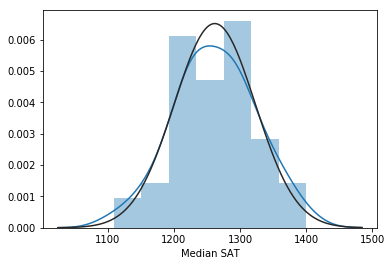

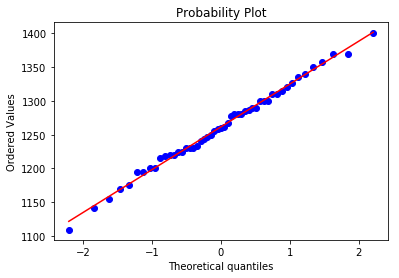

In [10]:
#Creating a distribution plot and a prob plot to see how normal our data is
sns.distplot(df['Median SAT'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Median SAT'], plot=plt)

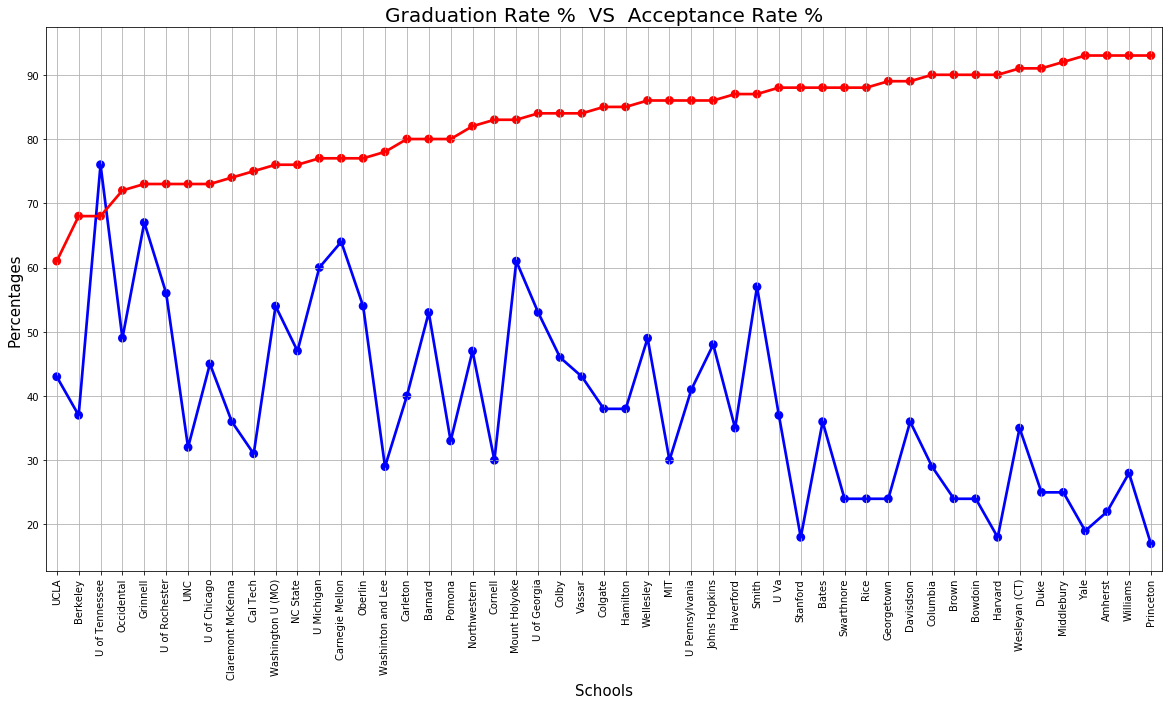

In [11]:
# Sorting our values so we can compare acceptance rate % as graduation % increases
df_sorted = df.sort_values(by=['Graduation % (Y)'])


fx, ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='School',y='Acceptance Rate',data=df_sorted,color='blue',alpha=0.8)
sns.pointplot(x='School',y='Graduation % (Y)',data=df_sorted,color='red',alpha=0.8)

#Creating our labels for the graph
plt.xlabel('Schools',fontsize = 15,color='black')
plt.ylabel('Percentages',fontsize = 15,color='black')

#Title for our graph
plt.title('Graduation Rate %  VS  Acceptance Rate %',fontsize = 20,color='black')

#Reformating our x labels to enhance readability
plt.xticks(rotation=90)
plt.grid()


As graduation rate starts to increase we can see a slight trend with acceptance rate % decreasing.


[Text(0,0.5,'Expenditures/Student'),
 Text(0,1.5,'Median SAT'),
 Text(0,2.5,'Top 10% HS'),
 Text(0,3.5,'Acceptance Rate'),
 Text(0,4.5,'Lib Arts'),
 Text(0,5.5,'University'),
 Text(0,6.5,'Graduation % (Y)')]

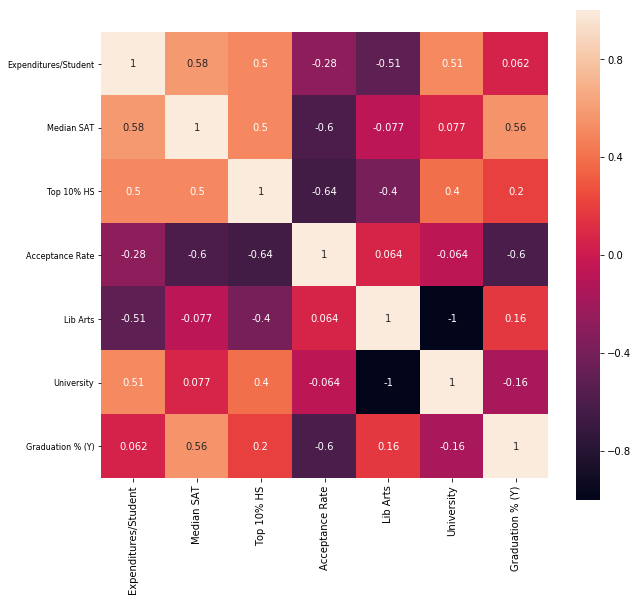

In [12]:
#Creating dummy variables for the school types
df_dummy = pd.get_dummies(df['Type'])

#Merging the dummy and orginal dataframes together
df_merge = pd.concat([df, df_dummy], axis=1)

#Rearranging the dataframes columns to put our target variable at the end
df_merge = df_merge[['School','Expenditures/Student', 'Median SAT','Top 10% HS', 'Acceptance Rate','Lib Arts', 'University','Graduation % (Y)']]                                                        

#Creating a correlation matrix
corrmat = df_merge.corr()
g, ax = plt.subplots(figsize=(10, 9))
g = sns.heatmap(corrmat, square=True, annot=True)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)

From the correlation matrix, we can see that two of the four variables have a strong correlation with graduation %. We can also see that there might be multicollinearity  between acceptance rate, median SAT and top 10% of HS variables.

# Preparing and Creating our Regression Model

We are going to use two tools to come up with a regression model, Scikit-learn and Statsmodel.

In [13]:
#Creating a list of columns to evaulate in our dataframe for outliers
columns = ['Expenditures/Student', 'Median SAT', 'Top 10% HS',
       'Acceptance Rate', 'Graduation % (Y)']

test_df = df_merge[df_merge[columns].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]  

#Checking how many outliers were removed
print(test_df.shape)
print(df_merge.shape)

(50, 8)
(51, 8)


In [14]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Picking the columns that we will use in our regression model
X = test_df[['Expenditures/Student', 'Median SAT', 'Top 10% HS',
       'Acceptance Rate', 'Lib Arts', 'University']]

# Setting our target variable
y = test_df['Graduation % (Y)']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Standarazing our data set
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

#Choosing our model
lm = LinearRegression()

#fitting the linear regression model to our training data
lm.fit(X_train, y_train)

#Printing out the coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.26786957  4.07810665 -2.26209331 -3.95705766  0.38797813 -0.38797813]


Text(0,0.5,'Predicted Y')

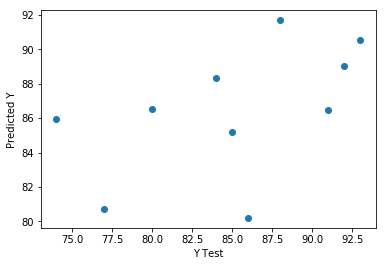

In [15]:
#Using our model to predict the x_test y values
predictions = lm.predict(X_test)

#Plotting the actual y values to the predicted y values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [16]:
# Looking at the error of our model
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.614556338869802
MSE: 30.028342920249933
RMSE: 5.47981230702749


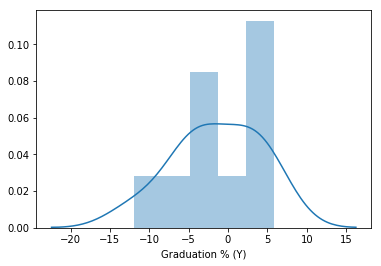

In [17]:
# Creating a distribution plot for predictions
sns.distplot((y_test-predictions),bins=5);

In [18]:
# Creating a dataframe to see our coeffecients
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Expenditures/Student,-0.267870
Median SAT,4.078107
Top 10% HS,-2.262093
Acceptance Rate,-3.957058
Lib Arts,0.387978
University,-0.387978


In [22]:
import statsmodels.formula.api as sm

# Chosing our dependent variables
X = np.append(arr= np.ones((50, 1)).astype(int), values = X, axis = 1)
X_opt = X[:,  [0, 1, 2, 3, 4, 5, 6]]

#[ 1 'Expenditures/Student', 2 'Median SAT', 3 'Top 10% HS',
#      4  'Acceptance Rate', '5 Lib Arts', 6 'University']
# [0, 1, 2, 3, 4, 5, 6]
#Chosing our model and fiting it
regressor_OLS = sm.OLS(endog= y, exog= X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:       Graduation % (Y)   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     14.37
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           1.24e-07
Time:                        23:24:21   Log-Likelihood:                -151.68
No. Observations:                  50   AIC:                             313.4
Df Residuals:                      45   BIC:                             322.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2505      8.178      1.131      0.2

In [31]:
# Picking the model with all signficant p-values
X_opt = X[:,  [0, 4, 5, 6]]
regressor_OLS = sm.OLS(endog= y, exog= X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:       Graduation % (Y)   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     19.41
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           2.83e-08
Time:                        23:28:06   Log-Likelihood:                -151.80
No. Observations:                  50   AIC:                             311.6
Df Residuals:                      46   BIC:                             319.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.4910     22.229      1.462      0.1

Our final Regression model is Y = -16.18 + (Acceptance Rate)*0.059 + (libArts) *-0.174 + (University)*-0.2955